In [1]:
#! swig -c++ -python swig/ising.i
#! python swig/setup_ising.py build_ext --inplace

In [1]:
import sys
import os
sys.path.append( os.path.abspath("swig") )
import ising
import numpy as np
import matplotlib.pyplot as plt
from DataReader import DataReader as dr

In [2]:
Rehnquist = dr.getRehnquist()

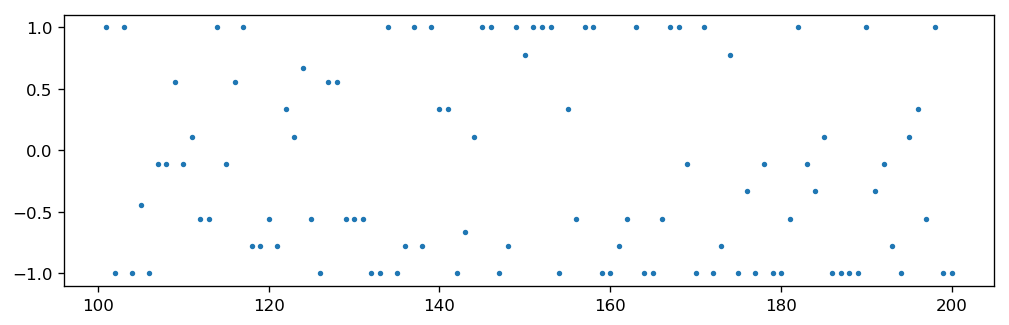

In [7]:
#Rehnquist
j1votes = Rehnquist[:,0]
#Stevens
j2votes = Rehnquist[:,1]
#OConnor
j3votes = Rehnquist[:,2]
#Scalia
j4votes = Rehnquist[:,3]
#Kennedy
j5votes = Rehnquist[:,4]
#Souter
j6votes = Rehnquist[:,5]
#Thomas
j7votes = Rehnquist[:,6]
#Ginsburg
j8votes = Rehnquist[:,7]
#Breyer
j9votes = Rehnquist[:,8]

cases = np.linspace(1,j1votes.size,j1votes.size)
courtMean = np.mean(Rehnquist, axis=1)

plt.figure(figsize=(10,3),dpi=120)
#plt.scatter(cases, j4votes, s=5)
#plt.scatter(cases, j8votes,c='orange', s=5)
plt.scatter(cases[100:200], courtMean[100:200], s=5)
plt.show()


[[1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [1.0 1.0 1.0 ... 1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 1.0]
 ...
 [1.0 1.0 1.0 ... -1.0 1.0 1.0]
 [-1.0 1.0 -1.0 ... 1.0 1.0 -1.0]
 [1.0 -1.0 1.0 ... 1.0 -1.0 1.0]]


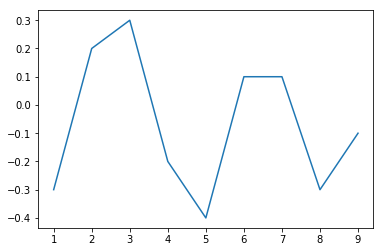

In [6]:
#Returns a number (generations) of randomly generated votes for a system of size numVotes (default is 9)
def randomVotes(generations, numVotes=9):
    return np.random.randint(-1, 2, size=(numVotes,generations))

gens = 10

u = np.zeros((gens,9))
v = randomVotes(gens)
x = np.linspace(1,9,9)
y = np.linspace(1,gens,gens)
# X,Y = np.meshgrid(x,y)

# plt.figure(dpi=150)
# plt.quiver(X,Y, u, v, scale=4.5*gens, )
# plt.xlim([0.25,9.5])
# plt.ylim([0.25,gens+0.5])
# plt.xlabel("Justice")
# plt.ylabel("Case")
# plt.xticks(np.linspace(1,9,9))
# plt.yticks(np.linspace(1,gens,gens))

# plt.show()

m = np.mean(v, axis=1)

plt.plot(x, m)
plt.show()